In [1]:
# Importing the pandas library
import pandas as pd

In [2]:
#read the dataset using pandas.
df=pd.read_csv(r'C:\\Users\\Ramachandraiah\\Downloads\\un-general-debates-blueprint (1).csv')

In [3]:
# Observing the first five records.
df.head()

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."


# Get the stopwords

In [4]:
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'i', 'having', 'can', "couldn't", 'has', 'few', "doesn't", 'the', 'all', 'a', 'more', "she's", 'so', 'before', 'who', 'aren', 'yourself', 'me', 'each', 'these', 'now', 'won', 'down', 'yourselves', 'such', 'against', 'wouldn', 'them', 'mustn', 'there', 'ain', 'am', 'do', 'were', 'myself', 'because', 'we', "mustn't", 'her', 'at', 'this', 'over', "shan't", 'being', 'm', 'ours', 'isn', 'but', 'very', 's', 'shouldn', 'what', 'after', 'from', 'he', 'its', "didn't", 'where', 'own', 'will', 'whom', 'when', 'some', 'as', "you'd", 'couldn', 'itself', 't', 'him', "should've", 'mightn', 'other', 'into', "wasn't", 'further', "mightn't", 'between', 'too', 'been', 'haven', 'ma', "aren't", "needn't", 'through', 'any', 'above', 'how', "weren't", 'those', 'most', "you'll", 'she', "it's", 'both', 'hasn', 'did', 'himself', 'than', 'of', 'during', 'theirs', 'and', 'for', 'below', 'y', "haven't", "shouldn't", 'in', 're', 'an', "hadn't", 'once', "you've", 'about', "won't", 'didn', 'nor', 'themselves', 'wasn

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ramachandraiah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Pre-processing pipeline

In [5]:
# Cleaning the text by performing tokenization, removing the stopwords and preprocessing the text.
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

# Now count the tokens

In [6]:
# Counting the frequency of the tokens
from collections import Counter

# Assuming df is already defined
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame(counter.items(), columns=['token', 'freq'])
freq_df = freq_df[freq_df['freq'] >= 1]  # Filtering frequencies >= 1
freq_df = freq_df.sort_values(by='freq', ascending=False)
freq_df.set_index('token', inplace=True)
freq_df.head(10)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


In [7]:
freq_df['freq']

token
nations          124508
united           120763
international    117223
world             89421
countries         85734
                  ...  
states-latin          1
of77                  1
lak                   1
pandaranaike          1
e-network             1
Name: freq, Length: 68302, dtype: int64

In [8]:
pip install WordCloud

# draw the word cloud

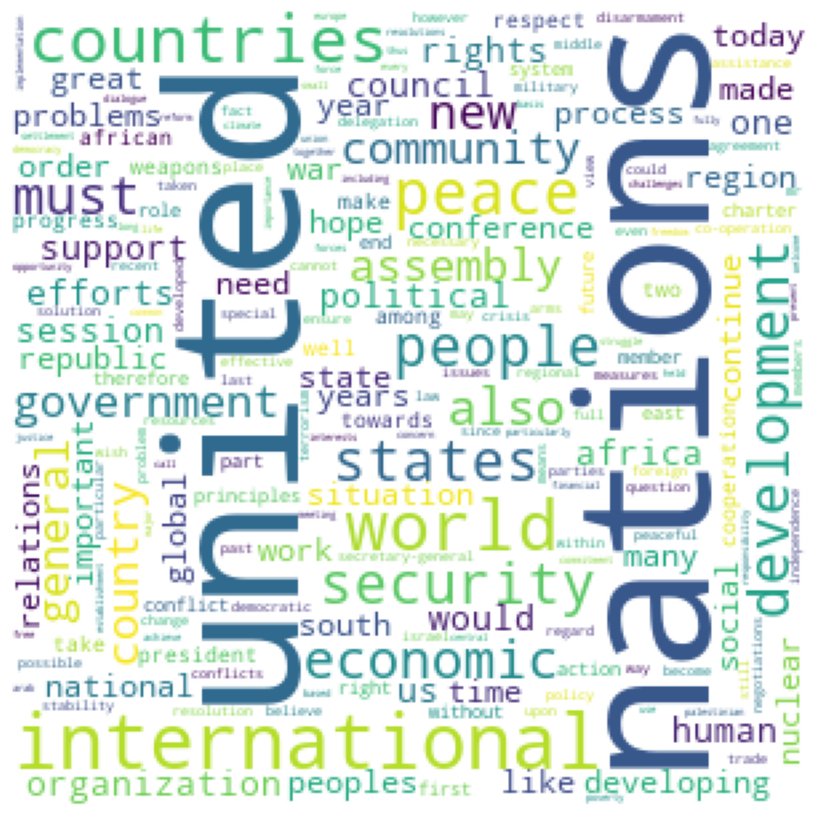

In [9]:
# displays a word cloud visualization from a DataFrame of word frequencies using the WordCloud library and Matplotlib.
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Now let’s do the TFIDF and compare

In [10]:
# Finding the document frequency and then inverse document frequency
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [11]:
idf_df['idf']

token
created               1.145436
simply                1.724470
sovietczechoslovak    9.023591
china                 1.766588
xnajority             9.023591
                        ...   
child-                9.023591
officiate             9.023591
states-supported      9.023591
pan-africa            9.023591
e-network             9.023591
Name: idf, Length: 68302, dtype: float64

In [12]:
# Multiplying the term frequency and inverse document frequency
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
nations,124508,12649.986284
united,120763,12285.608632
international,117223,12364.276226
world,89421,9503.708982
countries,85734,10888.485986


# Let’s draw the word cloud

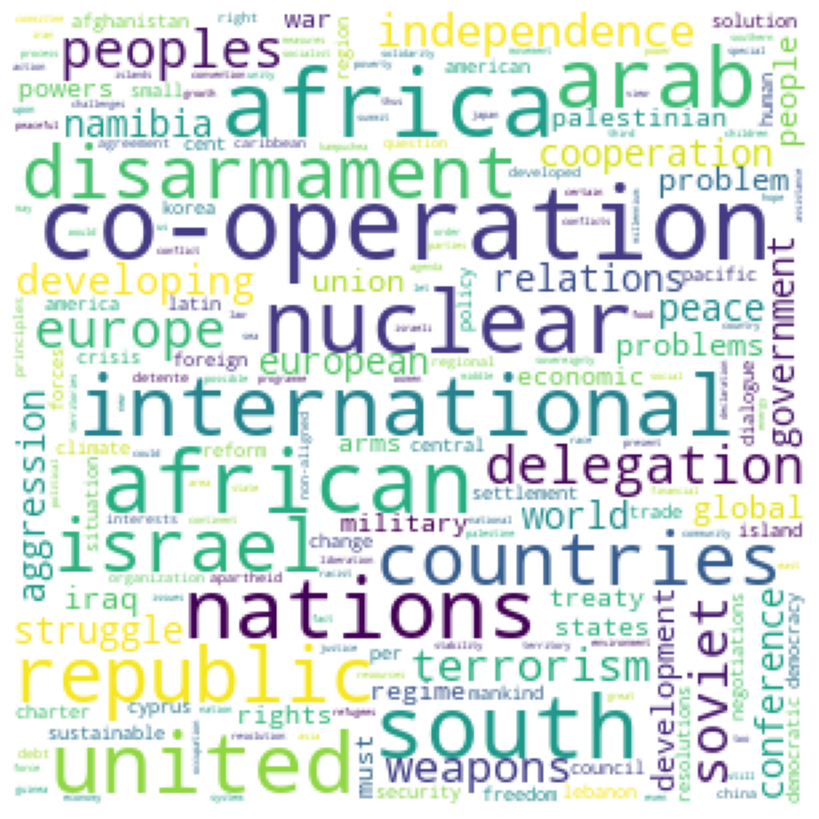

In [13]:
# displays a word cloud visualization from a DataFrame of product of term frequency and the inverse document frequency using the WordCloud library and Matplotlib.
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Function to count the keywords

In [14]:
# calculates the count of specific keywords within a list of tokens and returns a list of counts corresponding to each keyword.
df['num_tokens'] = df['tokens'].map(len)

def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

# Function to group by year

In [15]:
#count_keywords_by function calculates the sum of keyword counts grouped by a specified column in the DataFrame.
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)

# Draw!

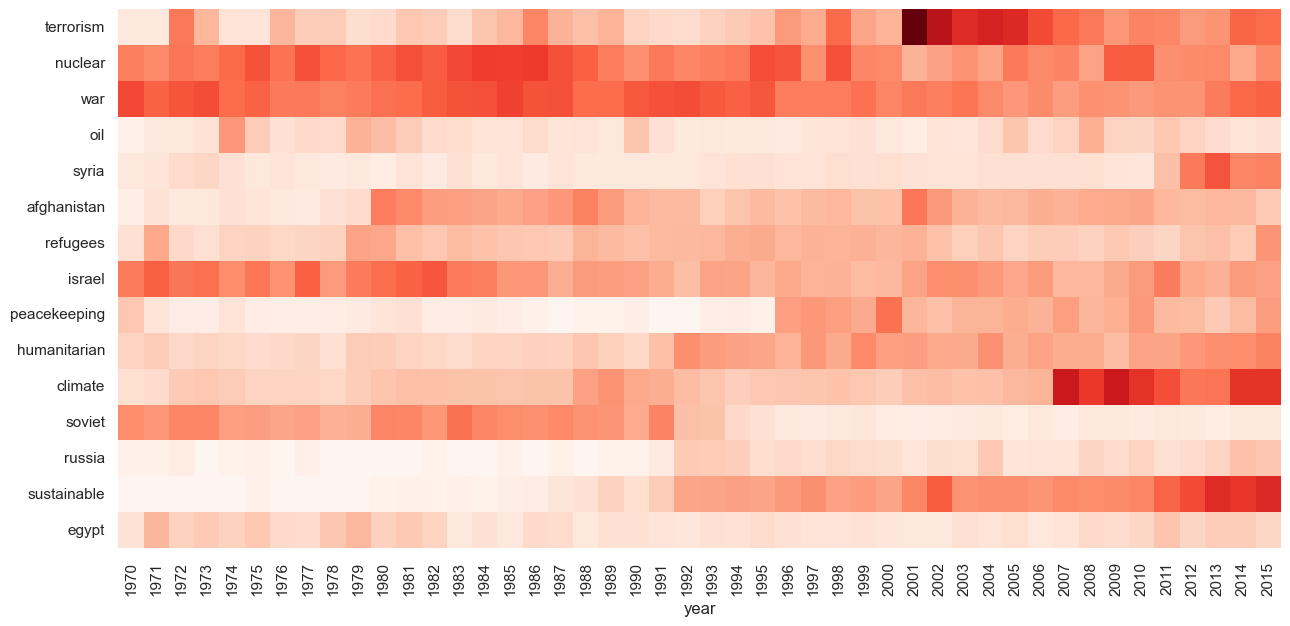

In [17]:
# visualizes the relative frequency of specific keywords over years using a heatmap with seaborn.
import seaborn as sns
keywords = ['terrorism', 'nuclear', 'war', 'oil',
            'syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping', 
            'humanitarian', 'climate', 'soviet','russia', 'sustainable','egypt']  
freq_df = count_keywords_by(df, by='year', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)